**Project – Housing prices model in California**

###### **ML Project Steps**: 

1. Take big view.
2. Get your data ready, explore your data.
3. Organize data for ML algorithms
4. Pick ML model and train it
5. Fine-tune parameters/models

# Setup

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns 

# to make this notebook's output identical at every run
np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
## matplotlib set ups
# plt.rcParams['axes.labelsize'] = 14
# plt.rcParams['xtick.labelsize'] = 12
# plt.rcParams['ytick.labelsize'] = 12
plt.style.use('seaborn-white')
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


######  Download the data

In [2]:
housing = pd.read_csv('housing.csv')

### 1. Take big view.

In [7]:
housing.tail(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [8]:
## There are total 10 attributes
len(housing.columns)

10

In [5]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [6]:
## summary of the housing data : columns and basic statistics
## Each row represents one district
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [9]:
## We noticed that ocean_proximity is an 'object', not a float64 data.
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
## Basic statistics : only for numerical attributes
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


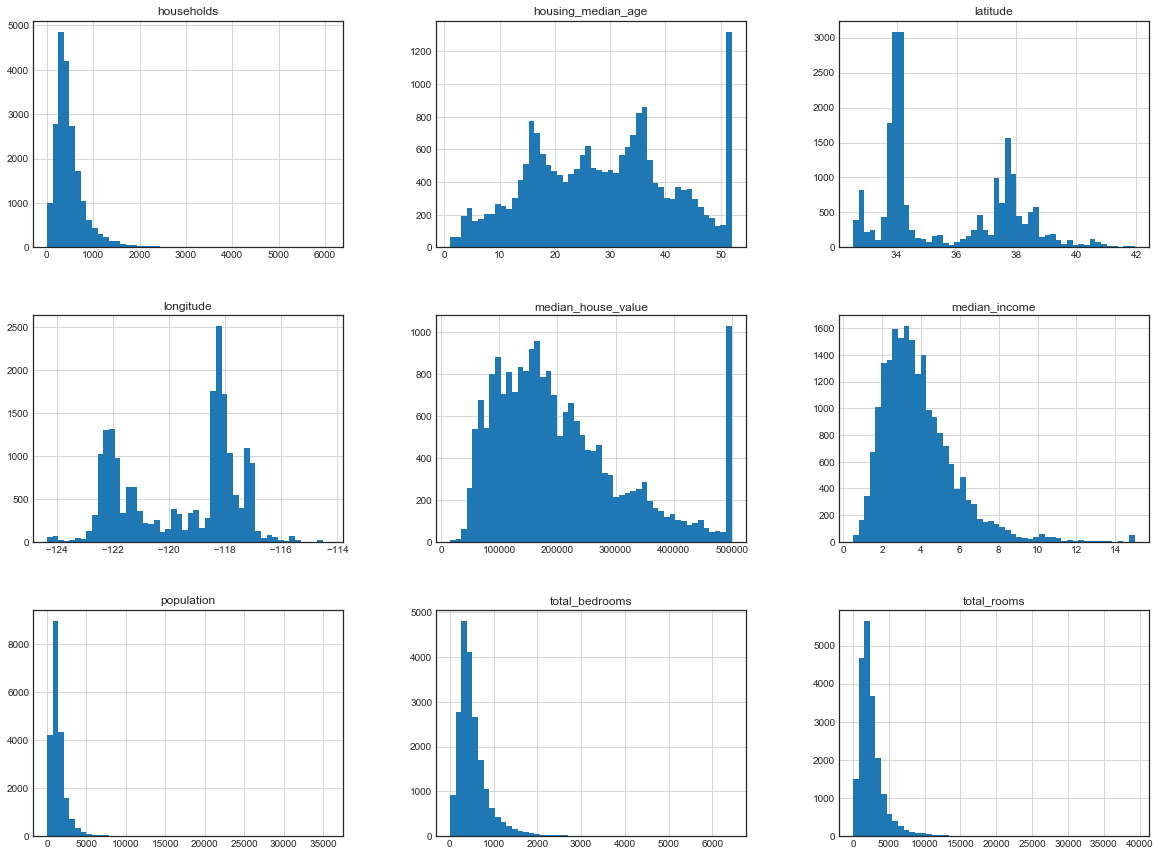

In [10]:
## Take a glance at the data
housing.hist(bins=50, figsize=(20,15))
plt.show()

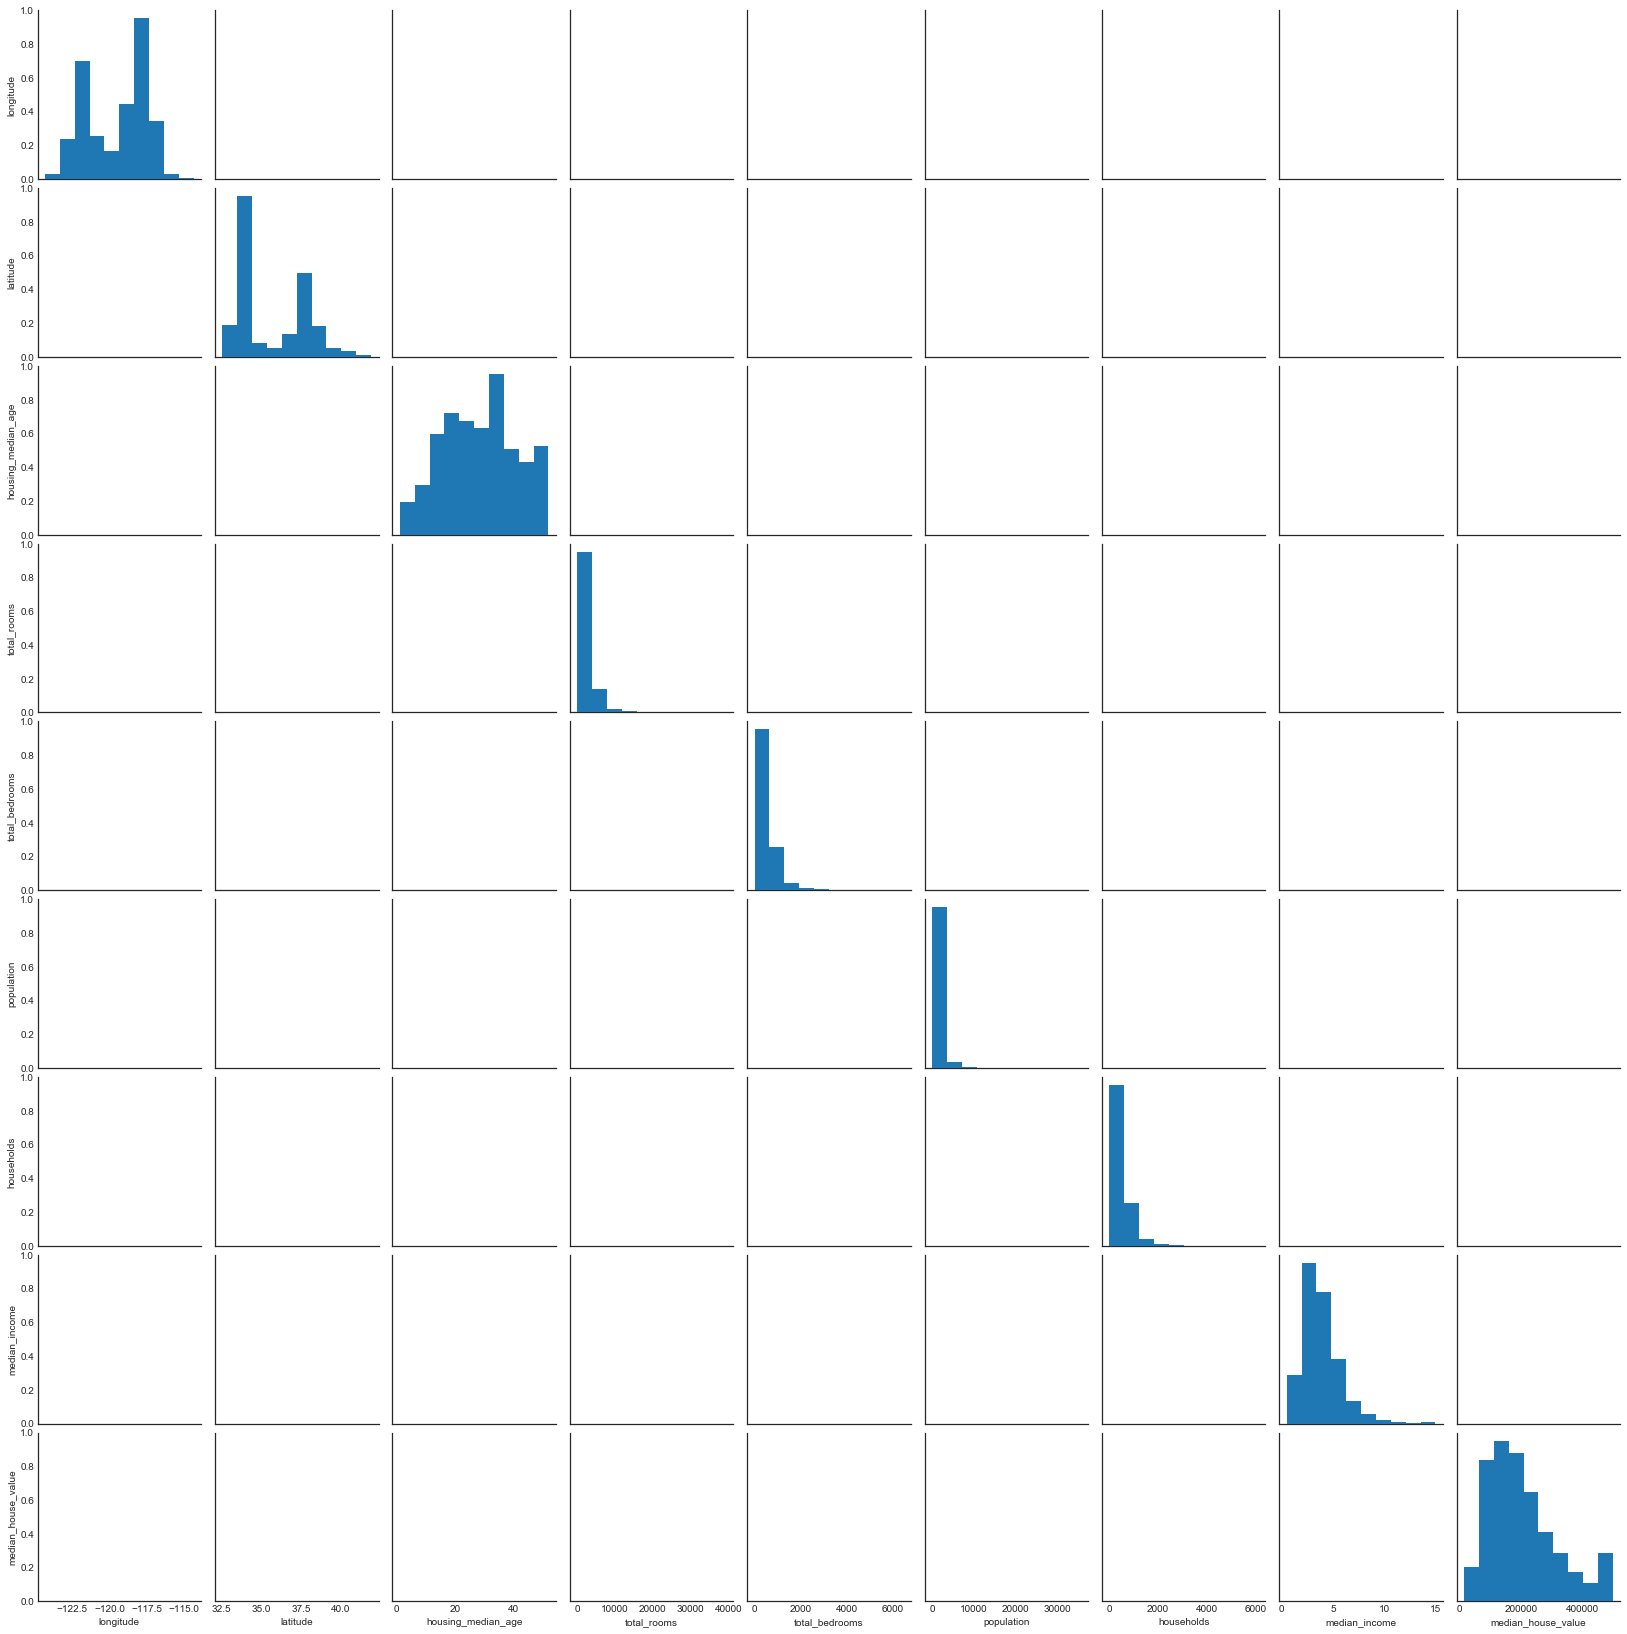

In [12]:
sns.pairplot(housing,kind='hist')

### 2. Get your data ready, explore your data.

In [3]:
## Split training set and test set 
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=101)

In [4]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
16086,-122.49,37.73,36.0,1821.0,292.0,742.0,298.0,5.6204,406200.0,NEAR OCEAN
8816,-118.32,33.75,37.0,1080.0,135.0,366.0,142.0,11.6677,500001.0,NEAR OCEAN
7175,-118.19,34.05,47.0,1273.0,264.0,1193.0,260.0,2.4375,122900.0,<1H OCEAN
16714,-120.68,35.51,17.0,1701.0,298.0,941.0,293.0,4.3218,209100.0,<1H OCEAN
14491,-117.24,32.85,22.0,3479.0,448.0,1252.0,440.0,10.0707,500001.0,NEAR OCEAN


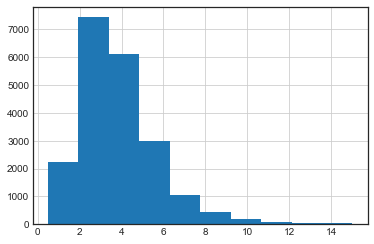

In [5]:
## Feature engineering
housing["median_income"].hist()

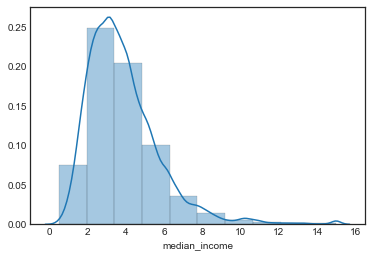

In [6]:
sns.distplot(housing['median_income'],bins=10, hist_kws=dict(edgecolor="k", linewidth=0.3))

We found that most median income values are clustered around 2-5. We can cap this feature by setting up some upper bounds/ thresholds.

In [7]:
# Divide by 1.5 to limit the number of income categories
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)

# Label those above 5 as 5
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [8]:
housing["income_cat"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

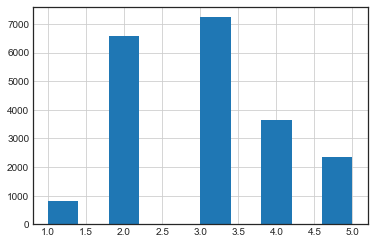

In [9]:
housing["income_cat"].hist()

####  Now we can do some stratified sampling based on the income category

In [10]:
## Now we can do some stratified sampling based on the income category
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=101)
## split.split(housing, housing["income_cat"]) will get a generator
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [11]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
11990,-117.53,33.97,34.0,1293.0,215.0,774.0,217.0,3.8906,141000.0,INLAND,3.0
19581,-120.77,37.64,8.0,3294.0,667.0,2277.0,652.0,2.6417,96800.0,INLAND,2.0
19781,-122.81,40.93,16.0,2050.0,471.0,588.0,195.0,2.7083,88900.0,INLAND,2.0
9508,-123.22,39.15,45.0,1348.0,265.0,639.0,270.0,3.3667,115200.0,<1H OCEAN,3.0
1125,-121.59,39.75,20.0,908.0,206.0,481.0,211.0,2.2000,80800.0,INLAND,2.0


In [12]:
## look at the proportions of the test set 
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [13]:
## proportions of the total dataset
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [14]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
11990,-117.53,33.97,34.0,1293.0,215.0,774.0,217.0,3.8906,141000.0,INLAND,3.0
19581,-120.77,37.64,8.0,3294.0,667.0,2277.0,652.0,2.6417,96800.0,INLAND,2.0
19781,-122.81,40.93,16.0,2050.0,471.0,588.0,195.0,2.7083,88900.0,INLAND,2.0
9508,-123.22,39.15,45.0,1348.0,265.0,639.0,270.0,3.3667,115200.0,<1H OCEAN,3.0
1125,-121.59,39.75,20.0,908.0,206.0,481.0,211.0,2.2000,80800.0,INLAND,2.0


In [15]:
## Remove the instrument variable to make the dataset turn back to original
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [16]:
housing = strat_train_set.copy()

In [17]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

The argument `sharex=False` fixes a display bug (the x-axis values and legend were not displayed). This is a temporary fix (see: https://github.com/pandas-dev/pandas/issues/10611). Thanks to Wilmer Arellano for pointing it out.

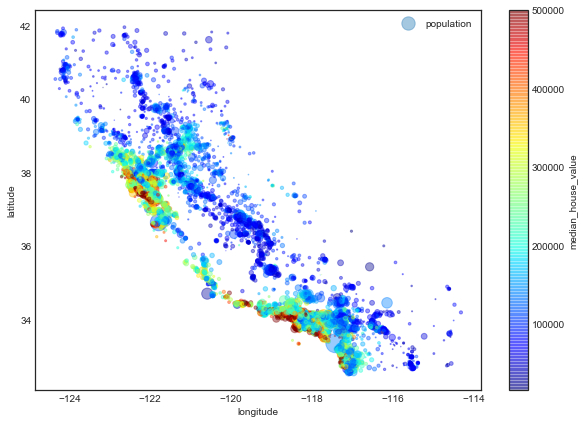

In [18]:
## Heatmap for median_house_value
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()


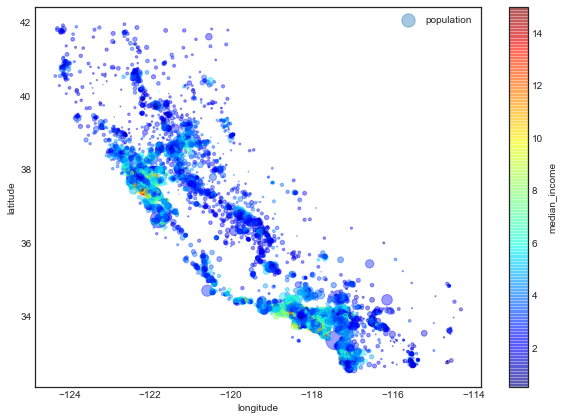

In [19]:
## Heatmap for median_income
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_income", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()


In [20]:
corr_matrix = housing.corr()

In [21]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924137,-0.110240,0.043720,0.069871,0.100655,0.055225,-0.015624,-0.047072
latitude,-0.924137,1.000000,0.015286,-0.034586,-0.066454,-0.108647,-0.070274,-0.080016,-0.143411
housing_median_age,-0.110240,0.015286,1.000000,-0.357627,-0.319361,-0.291098,-0.301314,-0.114653,0.106351
total_rooms,0.043720,-0.034586,-0.357627,1.000000,0.930265,0.856834,0.919857,0.197548,0.131549
total_bedrooms,0.069871,-0.066454,-0.319361,0.930265,1.000000,0.878292,0.979602,-0.008759,0.046111
population,0.100655,-0.108647,-0.291098,0.856834,0.878292,1.000000,0.907464,0.003667,-0.026466
households,0.055225,-0.070274,-0.301314,0.919857,0.979602,0.907464,1.000000,0.012748,0.062870
median_income,-0.015624,-0.080016,-0.114653,0.197548,-0.008759,0.003667,0.012748,1.000000,0.688761
median_house_value,-0.047072,-0.143411,0.106351,0.131549,0.046111,-0.026466,0.062870,0.688761,1.000000


In [22]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688761
total_rooms           0.131549
housing_median_age    0.106351
households            0.062870
total_bedrooms        0.046111
population           -0.026466
longitude            -0.047072
latitude             -0.143411
Name: median_house_value, dtype: float64

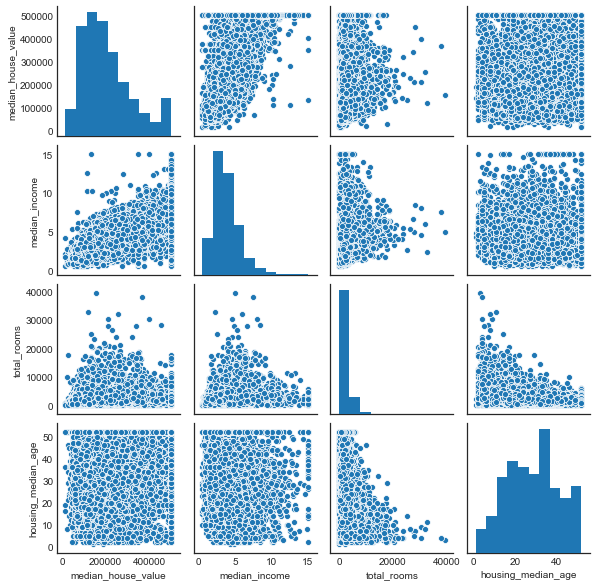

In [30]:
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
sns.pairplot(housing[attributes], height=2)

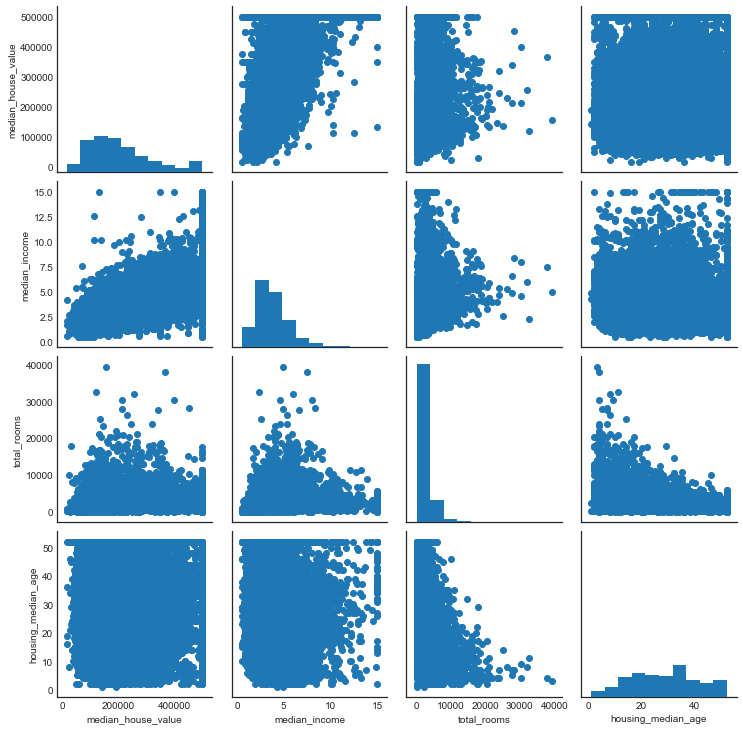

In [37]:
g = sns.PairGrid(housing[attributes])
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(plt.scatter)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c1b8d3090>,
      dtype=object)

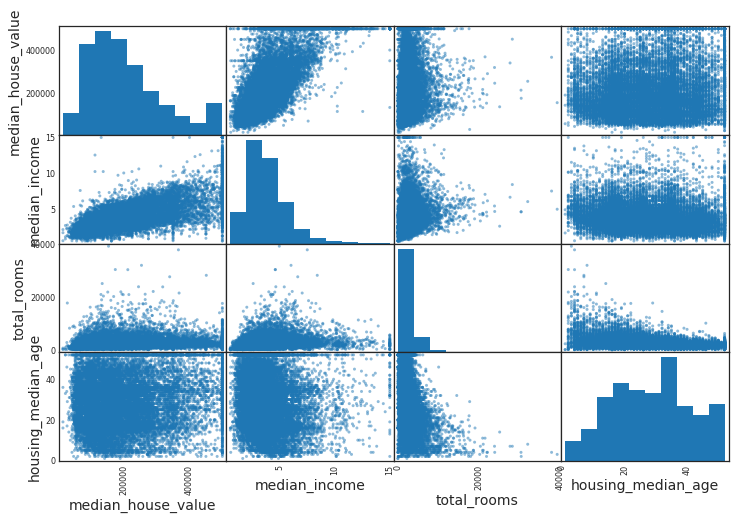

In [30]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))


[0, 16, 0, 550000]

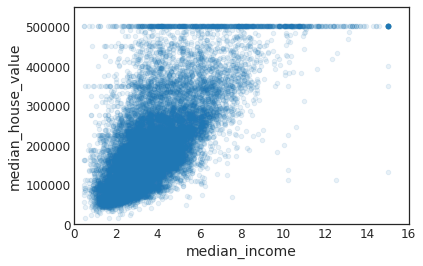

In [31]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])


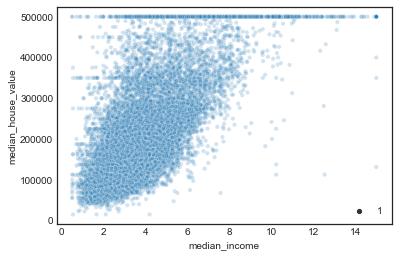

In [40]:
sns.scatterplot(x="median_income", y="median_house_value",data=housing, alpha=0.2, size=1)

In [41]:
## Add new features
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

Note: there was a bug in the previous cell, in the definition of the `rooms_per_household` attribute. This explains why the correlation value below differs slightly from the value in the book (unless you are reading the latest version).

In [42]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688761
rooms_per_household         0.148301
total_rooms                 0.131549
housing_median_age          0.106351
households                  0.062870
total_bedrooms              0.046111
population_per_household   -0.022174
population                 -0.026466
longitude                  -0.047072
latitude                   -0.143411
bedrooms_per_room          -0.252574
Name: median_house_value, dtype: float64

In [43]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924137,-0.110240,0.043720,0.069871,0.100655,0.055225,-0.015624,-0.047072,-0.022541,0.092096,0.000938
latitude,-0.924137,1.000000,0.015286,-0.034586,-0.066454,-0.108647,-0.070274,-0.080016,-0.143411,0.101747,-0.113051,0.003751
housing_median_age,-0.110240,0.015286,1.000000,-0.357627,-0.319361,-0.291098,-0.301314,-0.114653,0.106351,-0.147756,0.131827,0.013724
total_rooms,0.043720,-0.034586,-0.357627,1.000000,0.930265,0.856834,0.919857,0.197548,0.131549,0.127927,-0.189830,-0.023704
total_bedrooms,0.069871,-0.066454,-0.319361,0.930265,1.000000,0.878292,0.979602,-0.008759,0.046111,0.000292,0.081146,-0.027325
population,0.100655,-0.108647,-0.291098,0.856834,0.878292,1.000000,0.907464,0.003667,-0.026466,-0.072110,0.031428,0.067623
households,0.055225,-0.070274,-0.301314,0.919857,0.979602,0.907464,1.000000,0.012748,0.062870,-0.080856,0.060964,-0.026318
median_income,-0.015624,-0.080016,-0.114653,0.197548,-0.008759,0.003667,0.012748,1.000000,0.688761,0.317543,-0.608878,0.021048
median_house_value,-0.047072,-0.143411,0.106351,0.131549,0.046111,-0.026466,0.062870,0.688761,1.000000,0.148301,-0.252574,-0.022174
rooms_per_household,-0.022541,0.101747,-0.147756,0.127927,0.000292,-0.072110,-0.080856,0.317543,0.148301,1.000000,-0.401789,-0.005545


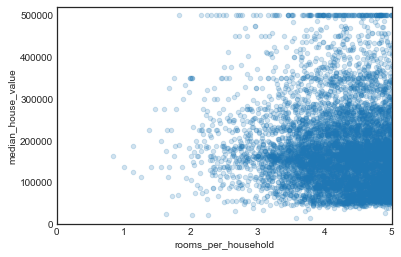

In [44]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [36]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,4.505810,0.231341,3.047847


In [37]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,206990.920724,5.440341,0.212878,3.096437
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,115703.014830,2.611712,0.057379,11.584826
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,119800.000000,4.442040,0.175304,2.431287
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000,5.232284,0.203031,2.817653
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,263900.000000,6.056361,0.239831,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


### 3. Organize data for ML algorithms

In [46]:
housing = strat_train_set.drop("median_house_value", axis=1) 
# drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

In [47]:
housing.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12403,-116.25,33.69,5.0,1664.0,444.0,907.0,374.0,2.7667,INLAND
14464,-117.23,32.81,24.0,3271.0,508.0,1496.0,482.0,5.9359,NEAR OCEAN


In [48]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
6220,-117.91,34.05,35.0,3189.0,NaN,1727.0,500.0,5.0758,<1H OCEAN
19607,-121.02,37.48,26.0,467.0,NaN,244.0,83.0,4.1346,INLAND
11512,-118.10,33.74,32.0,2035.0,NaN,934.0,512.0,4.2287,NEAR OCEAN
7763,-118.10,33.91,36.0,726.0,NaN,490.0,130.0,3.6389,<1H OCEAN
4691,-118.37,34.07,50.0,2519.0,NaN,1117.0,516.0,4.3667,<1H OCEAN


In [49]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [50]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
6220,-117.91,34.05,35.0,3189.0,1727.0,500.0,5.0758,<1H OCEAN
19607,-121.02,37.48,26.0,467.0,244.0,83.0,4.1346,INLAND
11512,-118.10,33.74,32.0,2035.0,934.0,512.0,4.2287,NEAR OCEAN
7763,-118.10,33.91,36.0,726.0,490.0,130.0,3.6389,<1H OCEAN
4691,-118.37,34.07,50.0,2519.0,1117.0,516.0,4.3667,<1H OCEAN


In [53]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
6220,-117.91,34.05,35.0,3189.0,434.0,1727.0,500.0,5.0758,<1H OCEAN
19607,-121.02,37.48,26.0,467.0,434.0,244.0,83.0,4.1346,INLAND
11512,-118.10,33.74,32.0,2035.0,434.0,934.0,512.0,4.2287,NEAR OCEAN
7763,-118.10,33.91,36.0,726.0,434.0,490.0,130.0,3.6389,<1H OCEAN
4691,-118.37,34.07,50.0,2519.0,434.0,1117.0,516.0,4.3667,<1H OCEAN


In [52]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
6220,-117.91,34.05,35.0,3189.0,434.0,1727.0,500.0,5.0758,<1H OCEAN
19607,-121.02,37.48,26.0,467.0,434.0,244.0,83.0,4.1346,INLAND
11512,-118.10,33.74,32.0,2035.0,434.0,934.0,512.0,4.2287,NEAR OCEAN
7763,-118.10,33.91,36.0,726.0,434.0,490.0,130.0,3.6389,<1H OCEAN
4691,-118.37,34.07,50.0,2519.0,434.0,1117.0,516.0,4.3667,<1H OCEAN


In [54]:
median

434.0

**Warning**: Since Scikit-Learn 0.20, the `sklearn.preprocessing.Imputer` class was replaced by the `sklearn.impute.SimpleImputer` class.

SimpleImputer is a scikit-learn class which is helpful in handling the missing data in the predictive model dataset.

In [55]:
from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
imputer = SimpleImputer(strategy="median")

Remove the text attribute because median can only be calculated on numerical attributes:

In [56]:
housing_num = housing.drop('ocean_proximity', axis=1)
# alternatively: housing_num = housing.select_dtypes(include=[np.number])

In [57]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [58]:
imputer.statistics_

array([-118.5    ,   34.26   ,   29.     , 2127.     ,  434.     ,
       1165.     ,  409.     ,    3.53665])

Check that this is the same as manually computing the median of each attribute:

In [59]:
housing.median()

longitude             -118.50000
latitude                34.26000
housing_median_age      29.00000
total_rooms           2127.00000
total_bedrooms         434.00000
population            1165.00000
households             409.00000
median_income            3.53665
dtype: float64

Transform the training set:

In [60]:
X = imputer.transform(housing_num)
## The result is a plain Numpy array
X

array([[-116.25  ,   33.69  ,    5.    , ...,  907.    ,  374.    ,
           2.7667],
       [-117.23  ,   32.81  ,   24.    , ..., 1496.    ,  482.    ,
           5.9359],
       [-117.09  ,   32.8   ,   15.    , ...,  247.    ,  164.    ,
           2.15  ],
       ...,
       [-117.25  ,   32.78  ,   36.    , ...,  710.    ,  312.    ,
           2.7857],
       [-121.22  ,   37.93  ,   21.    , ...,  206.    ,   73.    ,
           4.75  ],
       [-121.61  ,   37.77  ,   32.    , ...,  144.    ,   58.    ,
           4.2083]])

In [67]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index = list(housing.index))
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12403 to 992
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [63]:
housing_tr.loc[sample_incomplete_rows.index]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
6220,-117.91,34.05,35.0,3189.0,434.0,1727.0,500.0,5.0758
19607,-121.02,37.48,26.0,467.0,434.0,244.0,83.0,4.1346
11512,-118.10,33.74,32.0,2035.0,434.0,934.0,512.0,4.2287
7763,-118.10,33.91,36.0,726.0,434.0,490.0,130.0,3.6389
4691,-118.37,34.07,50.0,2519.0,434.0,1117.0,516.0,4.3667


In [64]:
imputer.strategy

'median'

In [68]:
# housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12403,-116.25,33.69,5.0,1664.0,444.0,907.0,374.0,2.7667
14464,-117.23,32.81,24.0,3271.0,508.0,1496.0,482.0,5.9359
14676,-117.09,32.80,15.0,666.0,152.0,247.0,164.0,2.1500
14178,-117.07,32.71,36.0,2448.0,475.0,1268.0,450.0,2.5682
10837,-117.94,33.68,26.0,4183.0,539.0,1504.0,520.0,7.4056


Now let's preprocess the categorical input feature, `ocean_proximity`:

In [69]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
12403,INLAND
14464,NEAR OCEAN
14676,NEAR OCEAN
14178,NEAR OCEAN
10837,<1H OCEAN
5448,<1H OCEAN
17626,<1H OCEAN
6830,<1H OCEAN
7216,<1H OCEAN
13209,INLAND


In [70]:
housing['ocean_proximity'].unique()

array(['INLAND', 'NEAR OCEAN', '<1H OCEAN', 'NEAR BAY', 'ISLAND'],
      dtype=object)

**Warning**: earlier versions of the book used the `LabelEncoder` class or Pandas' `Series.factorize()` method to encode string categorical attributes as integers. However, the `OrdinalEncoder` class that was introduced in Scikit-Learn 0.20 (see [PR #10521](https://github.com/scikit-learn/scikit-learn/issues/10521)) is preferable since it is designed for input features (`X` instead of labels `y`) and it plays well with pipelines (introduced later in this notebook). If you are using an older version of Scikit-Learn (<0.20), then you can import it from `future_encoders.py` instead.

In [71]:
from sklearn.preprocessing import OneHotEncoder

In [72]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [73]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

###### (!!! Advanced Sklearn usage) Let's create a custom transformer to add extra attributes:

In [59]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [60]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


Now let's build a pipeline for preprocessing the numerical attributes:

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [62]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

**Warning**: earlier versions of the book applied different transformations to different columns using a solution based on a `DataFrameSelector` transformer and a `FeatureUnion` (see below). It is now preferable to use the `ColumnTransformer` class that was introduced in Scikit-Learn 0.20. If you are using an older version of Scikit-Learn, you can import it from `future_encoders.py`:

In [63]:
from sklearn.compose import ColumnTransformer

In [64]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [65]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [66]:
housing_prepared.shape

(16512, 16)

# 4. Pick ML model and train it

In [67]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


Compare against the actual values:

In [69]:
print("Labels:", list(some_labels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [70]:
some_data_prepared

array([[-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
        -0.63621141, -0.42069842, -0.61493744, -0.31205452, -0.08649871,
         0.15531753,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , -0.90896655, -1.0369278 ,
        -0.99833135, -1.02222705,  1.33645936,  0.21768338, -0.03353391,
        -0.83628902,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, -0.31365989, -0.15334458,
        -0.43363936, -0.0933178 , -0.5320456 , -0.46531516, -0.09240499,
         0.4222004 ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-0.01706767,  0.31357576, -0.29052016, -0.36276217, -0.39675594,
         0.03604096, -0.38343559, -1.04556555, -0.07966124,  0.08973561,
        -0.19645314,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.49247384, -0.65929936, -0

In [71]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

In [72]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49439.89599001897

## How about we using another model, like 


In [73]:
from sklearn.tree import DecisionTreeRegressor

In [74]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [75]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [78]:
import sklearn
sklearn.__version__

'0.22.1'